<a href="https://colab.research.google.com/github/Keith-LJY001/NMC5342_A0234542L/blob/main/Part_3_Data_Cleaning_and_Keyword_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 3. Data Cleaning and Keyword Analysis

# Part 1. Load Data
## 1.1 Import Libraries
## 1.2 Read CSV File

In [1]:
from google.colab import files
uploaded = files.upload()

Saving scraped_Reddit_Dataset.csv to scraped_Reddit_Dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv("scraped_Reddit_Dataset.csv")
df.head()

,comment_id,parent_id,author,score,created_utc,Time/Date,body
0,m6ln2mf,t3_1hz0dd1,AutoModerator,1,1736615033,12/01/2025 01:03,Articles from this site may be behind a paywal...
1,m6o1p7h,t3_1hz0dd1,Fair-Second-642,504,1736642766,12/01/2025 08:46,They are missing the point. I believe Singapor...
2,m6oyy85,t3_1hz0dd1,jeffrey745,55,1736654647,12/01/2025 12:04,I know of some foreigners here who have been h...
3,m6oe1hv,t3_1hz0dd1,TaskPlane1321,30,1736646960,12/01/2025 09:56,Look who's talking! Integration of the migr...
4,m6ouyy4,t3_1hz0dd1,Katashi90,29,1736653085,12/01/2025 11:38,If he still doesn't understand how far deep we...


#Part 2: Remove unwanted elements
URLs (e.g., regex: r"http\S+")
Emojis and special symbols (if necessary)
Extra spaces and punctuation
*exclude bot comments, remove null values


In [3]:
##Drop nulls first
print(df.columns)
df = df.dropna(subset = ['body'])
print(len(df))

Index(['comment_id', 'parent_id', 'author', 'score', 'created_utc',
       'Time/Date', 'body'],
      dtype='object')
1071


In [16]:
##Drop bot comments
#Essentially, as long as author is 'AutoModerator' or
#body text states that it is a bot

df = df[~(
    (df['author'].str.lower() == 'automoderator') |
    (df['body'].str.contains('I am a bot, and this action was performed automatically.', case=False, na=False))
)]

#drop deleted comments
df = df[~df['body'].str.lower().eq('deleted')]

print("Remaining rows:", len(df))

Remaining rows: 1045


In [17]:
##Removing URLs
#delete links like "https:", "http:" or "www."
#match case-insensitive so "HTTP:" also removed
import re
url_re = re.compile(r"(https?://\S+|www\.\S+)", flags=re.IGNORECASE)
df['body'] = df['body'].astype(str).apply(lambda x: url_re.sub(" ", x))

In [18]:
##remove extra spaces
#replace multiple spaces with single space
#remove leading white spaces
multispace_re = re.compile(r"\s+")
df['body'] = df['body'].apply(lambda x: multispace_re.sub(" ", x))
df['body'] = df['body'].str.strip()

In [19]:
##remove extra or weird punctuation
#but keep certain punctuation like "!", "?", etc.
punct_re = re.compile(r"[^0-9A-Za-z\s\.\,\!\?\-\$\#@]")
df['body'] = df['body'].astype(str).apply(lambda x: punct_re.sub(" ", x))

#may cause more white spaces to appear after this, so re-clean
df['body'] = df['body'].apply(lambda x: multispace_re.sub(" ", x)).str.strip()

# Part 3: Apply text preprocessing using nltk or spaCy:
Tokenize words (word_tokenize or spacy.tokens)

Lowercase all text

Lemmatize or stem words

Remove stopwords


In [10]:
#Install required packages for text preprocessing using nltk or spaCy
!pip install nltk spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 110.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [12]:
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

#Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
#Using spaCy
nlp = spacy.load('en_core_web_sm') #Load the small English model

#define function that takes one string and returns a cleaned version
#lowercase all text and ensure they are strings
#Tokenize, lemmatize through spaCy
#convert tokenenized list back to single-spaced separated string
def clean_text_spacy(text):
    doc = nlp(str(text).lower())
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and token.is_alpha
    ]
    return " ".join(tokens)

#Applies function to every row in the body column.
#Creates new column cleaned_text with the processed text.

df['cleaned_text'] = df['body'].apply(clean_text_spacy)

#Check results of spaCy
df[['body', 'cleaned_text']].head(10)


,body,cleaned_text
1,They are missing the point. I believe Singapor...,miss point believe singaporeans accept new com...
2,I know of some foreigners here who have been h...,know foreigner year study poly uni work barely...
3,Look who s talking! Integration of the migrant...,look s talk integration migrant local key bear...
4,If he still doesn t understand how far deep we...,doesn t understand far deep need ask overall p...
5,Build more housing first. Then talk.,build housing talk
6,Then we serve NS for fuck?,serve ns fuck
7,how far are we from 6.9 million? brace yoursel...,far million brace guy
8,But we must also stand firmly against nativism...,stand firmly nativism xenophobia welcome new a...
9,Ownself import so indiscriminately until the w...,ownself import indiscriminately social fabric ...
11,For the past decade they have claimed and been...,past decade claim tell manage immigrant come g...


# Part 4: word frequency table & word cloud

In [23]:
#install wordcloud package
!pip install wordcloud


In [25]:
#import necessary packages
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [33]:
from collections import Counter

#Combine cleaned text into one big string
all_words = " ".join(df['cleaned_text'].astype(str))

#Split into individual words
words = all_words.split()

#Remove meaningless fragments (initial output revealed fragmented words)
extra_stopwords = {'s', 't', 'don', 'im', 'll', 've', 're', 'm'}
valid_words = [w for w in words if w not in extra_stopwords and len(w) > 2 and w.isalpha()]

#Count word frequencies
word_freq = Counter(valid_words)

#Display top 20 words
word_freq_df.head(20)


,word,frequency
152,singapore,231
89,like,200
221,citizen,186
77,country,172
5,new,171
82,people,166
30,local,143
437,china,133
598,chinese,132
20,work,101


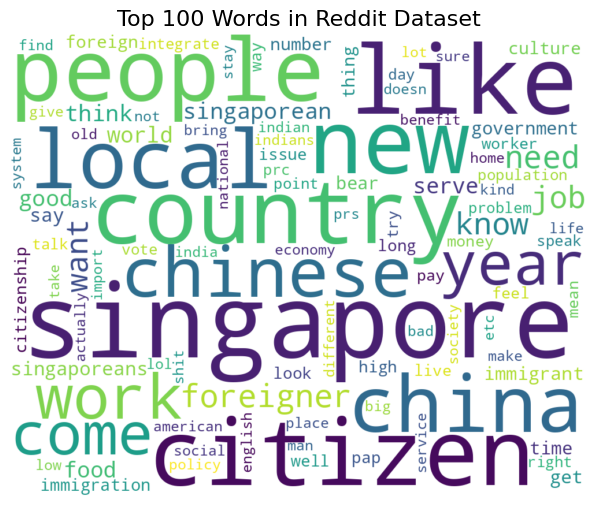

In [42]:
#Convert word frequencies to DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

#Convert frequency DataFrame to a dictionary
freq_dict = dict(zip(word_freq_df['word'], word_freq_df['frequency']))

#Generate word cloud
wordcloud = WordCloud(
    width=1000,
    height=800,
    background_color='white',
    colormap='viridis',
    max_words=100,
    random_state=42
).generate_from_frequencies(freq_dict)

#Wordcloud display
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 100 Words in Reddit Dataset", fontsize=16)
plt.show()


In [41]:
#Calculate TF–IDF scores with TfidfVectorizer(sklearn.feature_extraction.text)
from sklearn.feature_extraction.text import TfidfVectorizer



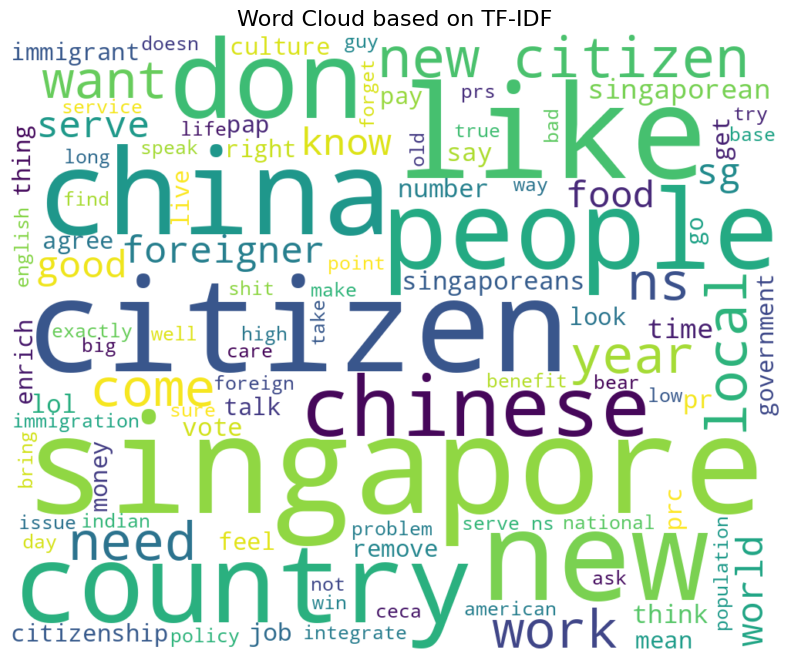

In [51]:
import numpy as np

# TF-IDF word clouds from df['clean_comment']
from sklearn.feature_extraction.text import TfidfVectorizer

texts = df['cleaned_text'].fillna("").astype(str).tolist()

#Build TF-IDF matrix
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=1,
    max_df=0.9,
    sublinear_tf=True,
    norm="l2",
    stop_words=None
)
X = vectorizer.fit_transform(texts)
vocab = vectorizer.get_feature_names_out()

#Corpus-level TF-IDF word cloud
term_scores = np.asarray(X.sum(axis=0)).ravel()
weights_corpus = {vocab[i]: float(term_scores[i]) for i in range(len(vocab))}

wc = WordCloud(width=1000, height=800, background_color="white", max_words=100
               ,colormap='viridis')
wc = wc.generate_from_frequencies(weights_corpus)

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud based on TF-IDF", fontsize=16)
plt.show()


#Part 5: Calculate TF–IDF scores

In [53]:
#average (or sum) TF–IDF for each term
avg_tfidf = np.asarray(X.mean(axis=0)).ravel()
top_terms_df = (
    pd.DataFrame({'term': vocab, 'avg_tfidf': avg_tfidf})
      .sort_values('avg_tfidf', ascending=False)
      .reset_index(drop=True)
)

#show top 20 distinctive words/phrases
top_terms_df.head(20)


,term,avg_tfidf
0,singapore,0.014044
1,like,0.012563
2,citizen,0.012347
3,new,0.011586
4,china,0.010494
5,people,0.010012
6,country,0.009916
7,don,0.009771
8,chinese,0.009067
9,new citizen,0.008625


#Part 6: Findings

Top recurring words

Themes

Framings

In [56]:
#Interpret your findings:
#What are the top recurring words? Themes or framing?

##Findings

#Recurring high-weight terms:
#singapore, citizen, chinese, foreigner, local, ns, work

#Discussions around national identity, immigration, and employment.
#Netizens like discussed how national identity is framed in the local context
#(via ns, being a singaporean citizen, etc.)
#versus how immigrants are coming in with different identities (notably China)

#Compound terms (bigrams) like "new citizen"
#Indicates conversation about naturalisation & integration.

3#Dropped generic words:
#words like like, know, think
#TF-IDF filters these out because they don’t define any single thread.

##interestingly, discourse centred around Chinese nationals (from China)
#but not on Indians?

# count total mentions of "india" or "indian" (case-insensitive)
total_mentions = df['cleaned_text'].str.lower().str.count(r'\bindia[n]?\b').sum()
print(f"Total mentions of 'India' or 'Indian': {int(total_mentions)}")
#In contrast, China and Chinese were mentioned 133 and 132 times respectively
#this trend shows that China immigration is a bigger topic of discourse
#as compared to India immigration

Total mentions of 'India' or 'Indian': 64
